## Descriptive overview of crawled literature by crawl
___
__Creator:__ Richard <br>
__Crawled database:__ Science Direct incl. all Elsvier databases<br>
__Date:__ 03.12.2018<br>
__Purpose:__ No specific<br>

__Used query for this crawl:__<br>
```
"Title-Abstr-Key%28Clustering+is%29+AND+Title%28Clustering%29"
```

__Additional comments:__<br>
<p>...</p>

In [58]:
import os 
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

PATH_TO_DF = "../data/crawl_dataframes/ScienceDirectCrawler_clustering is_crawl.pkl"
CRAWL_TITLE = "Clustering is - Science Direct"
COLORS = ["#00678F", "#FDB50A", "#7CB700"]

#### Load the pickled dataframe

In [59]:
df = pickle.load(open(PATH_TO_DF, "rb"))
df.iloc[:5]

,title,years,months,days,author
0,A novel scaleinvariant dynamic method for hier...,2018,12,15,"Federica Vignati, Damiano Fustinoni, Alfonso N..."
1,A kmeans based coclustering kCC algorithm for ...,2019,03,15,"Syed Fawad Hussain, Muhammad Haris,"
2,Semisupervised deep embedded clustering,2019,01,24,"Yazhou Ren, Kangrong Hu, Xinyi Dai, Lili Pan, ..."
3,MCEDA A novel manyobjective optimization appro...,2019,01,01,"Xiaoxu Duan,"
4,MLBC Multiobjective Load Balancing Clustering ...,2019,01,01,"Sukhchandan Randhawa, Sushma Jain,"


### General descriptive overview

In [60]:
description = df.describe()
description

,title,years,months,days,author
count,6000,6000,6000,6000,6000
unique,5988,19,12,31,5768
top,Chapter Clustering,2018,01,01,"Arkajyoti Saha, Swagatam Das,"
freq,5,896,1054,4579,6


### Used publications over years

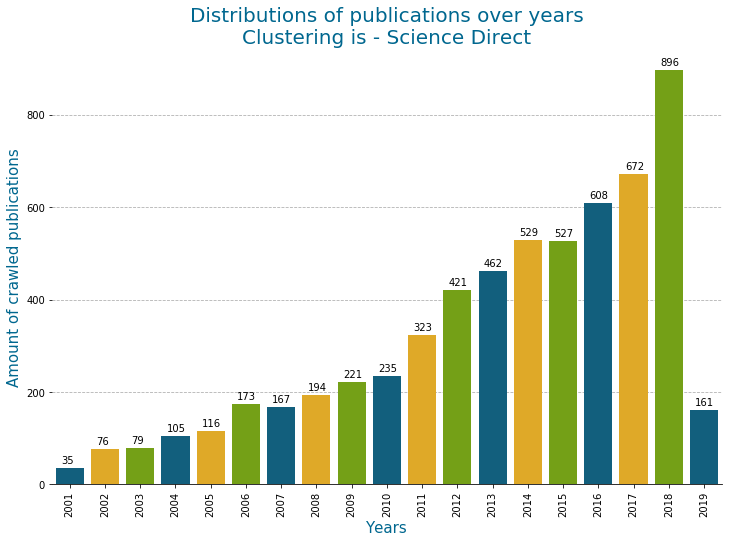

In [61]:
plt.figure(figsize=(12,8))
plt.gca().yaxis.grid(True, linestyle="--", zorder=0)
year_overview = sns.countplot(x="years", data=df, palette=COLORS,  zorder=10)
year_overview_labels = year_overview.get_xticklabels()
ticks_rotation = year_overview.set_xticklabels(year_overview_labels, rotation=90)
for p in year_overview.patches:
    year_overview.annotate(str(p.get_height()), (p.get_x()+0.15, p.get_height()+10))
plt.title('Distributions of publications over years\n{}'.format(CRAWL_TITLE), 
          fontsize=20, color=COLORS[0])
plt.xlabel('Years', fontsize=15, color=COLORS[0])
plt.ylabel('Amount of crawled publications', 
           fontsize=15, color=COLORS[0])
year_overview.spines['top'].set_visible(False)
year_overview.spines['right'].set_visible(False)
year_overview.spines['left'].set_visible(False)

### Used publications by month

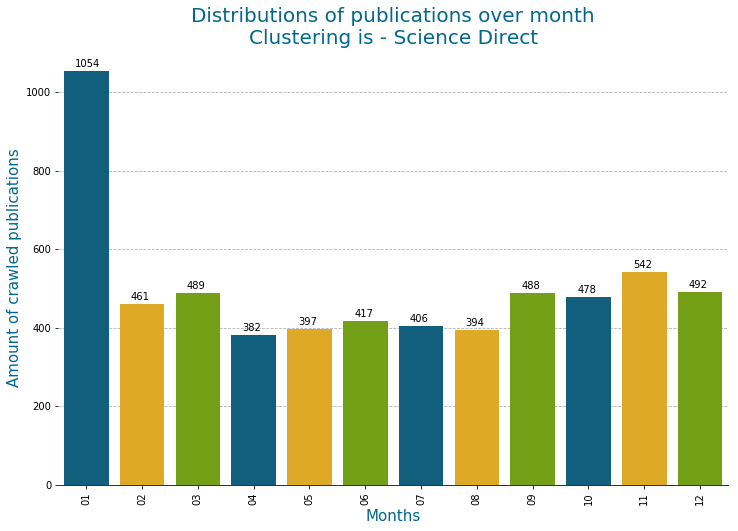

In [62]:
month_data = df.groupby("months").count()
plt.figure(figsize=(12,8))
plt.gca().yaxis.grid(True, linestyle="--", zorder=0)
months_overview = sns.countplot(x="months", data=df, palette=COLORS,  zorder=10)
months_overview_labels = months_overview.get_xticklabels()
months_ticks_rotation = months_overview.set_xticklabels(months_overview_labels, rotation=90)
for p in months_overview.patches:
    months_overview.annotate(str(p.get_height()), (p.get_x()+0.2, p.get_height()+10))

plt.title('Distributions of publications over month\n{}'.format(CRAWL_TITLE), 
          fontsize=20, color=COLORS[0])
plt.xlabel('Months', fontsize=15, color=COLORS[0])
plt.ylabel('Amount of crawled publications', 
           fontsize=15, color=COLORS[0])
months_overview.spines['top'].set_visible(False)
months_overview.spines['right'].set_visible(False)
months_overview.spines['left'].set_visible(False)
